# The Battle of Neighborhoods (Part-II)
## This is the IBM Data Science Capstone Project peer review assignment that will be shared through github ##

## our covid-19 challenge aims to solve the problem of load balancing patient load beteeen available hospitals in a given area##
### We answer the basic question: "If you are headed to the ER, would you rather go to an overflowing ER closest to you or travel a longer distance where the necessary medical staff and logistics are waiting for you" ###
#### Vision: We are optimized for pandemics ####

In [1]:
import pandas as pd
import numpy as np

print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## The assignment for the first week starts here##  

In [2]:
# Import all required libraries
!conda install -c conda-forge fbprophet --yes
# Matplotlib and associated plotting modules
import matplotlib as mpl
from matplotlib import pyplot as plt
from fbprophet import Prophet
import matplotlib.cm as cm
import matplotlib.colors as colors

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.



Importing plotly failed. Interactive plots will not work.


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.21.0         | 58 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Package Plan ##

  en

In [3]:
canada_wiki_url= 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_cn_data= pd.read_html(canada_wiki_url, header=0)[0]
# replace "Not assigned" to NaN
df_cn_data.replace("Not assigned", np.nan, inplace = True)
print('canada boroughs data downloaded from wikipedia!')

canada boroughs data downloaded from wikipedia!


In [4]:
df_cn_data.head()

Postal code           Borough                Neighborhood
0         M1A               NaN                         NaN
1         M2A               NaN                         NaN
2         M3A        North York                   Parkwoods
3         M4A        North York            Victoria Village
4         M5A  Downtown Toronto  Regent Park / Harbourfront

In [5]:
df_cn_data.shape

(180, 3)

In [6]:
df_cn_data.dropna(subset=['Borough', 'Neighborhood'], inplace=True)

## Check the new data frame after dropping lines where Borough is Not assigned as requested##  

In [7]:
# Check the new data frame after dropping lines where Borough is Not assigned as requested
df_cn_data.head()

Postal code           Borough                                  Neighborhood
2         M3A        North York                                     Parkwoods
3         M4A        North York                              Victoria Village
4         M5A  Downtown Toronto                    Regent Park / Harbourfront
5         M6A        North York             Lawrence Manor / Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park / Ontario Provincial Government

## Check the new shape ##

## Assignment continues to Step-2 where the lat/long columns are added based on the data from Geocoder ## 

In [8]:
df_cn_data.shape

(103, 3)

In [9]:
# Using geo coder directly as an alternate implementation
# NOTE: May require authentication to Googpe APIs for this to work
# For the current project, for Toronto, we bypass by going to a pre-prepared file at http://cocl.us/Geospatial_data
####################################################################################################################
#import geocoder

# initialize your variable to None
# lat_lng_coords = None

# loop until you get the coordinates
#while(lat_lng_coords is None):
#    g = geocoder.google('{}, Toronto, Ontario'.format('M1B'))  # <=  This is only for M1B
#   lat_lng_coords = g.latlng

#latitude = lat_lng_coords[0]
#longitude = lat_lng_coords[1]

#NOTE: The above code needs to be looped through each postal code.. Above loop is to get reliable data for M1B only.
####################################################################################################################

# Using Alternate method to use already created data
geo_url= 'http://cocl.us/Geospatial_data'
df_geo= pd.read_csv(geo_url)
df_geo.head

<bound method NDFrame.head of     Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.

## Now add the lat long columns in the Boroughs dataframe with matching entries from the geo data dataframe ##

In [10]:
# Now add the lat long columns in the Boroughs dataframe with matching entries from the geo data dataframe
df_cn_data.sort_values(['Postal code'], ascending=1, inplace=True)
df_cn_data.head()
df_cn_data.describe()

Postal code     Borough Neighborhood
count          103         103          103
unique         103          10           98
top            M5G  North York    Downsview
freq             1          24            4

In [11]:
df_geo.sort_values(['Postal Code'], ascending=1, inplace=True)

In [12]:
df_cn_data['Latitude']= df_geo['Latitude'].values

In [13]:
df_cn_data['Longitude']= df_geo['Longitude'].values

In [14]:
df_cn_data.reset_index(drop=True)

Postal code           Borough  \
0           M1B       Scarborough   
1           M1C       Scarborough   
2           M1E       Scarborough   
3           M1G       Scarborough   
4           M1H       Scarborough   
5           M1J       Scarborough   
6           M1K       Scarborough   
7           M1L       Scarborough   
8           M1M       Scarborough   
9           M1N       Scarborough   
10          M1P       Scarborough   
11          M1R       Scarborough   
12          M1S       Scarborough   
13          M1T       Scarborough   
14          M1V       Scarborough   
15          M1W       Scarborough   
16          M1X       Scarborough   
17          M2H        North York   
18          M2J        North York   
19          M2K        North York   
20          M2L        North York   
21          M2M        North York   
22          M2N        North York   
23          M2P        North York   
24          M2R        North York   
25          M3A        North York   
26          M3B        North York   
27          M3C        North York   
28          M3H        North York   
29          M3J        North York   
30          M3K        North York   
31          M3L        North York   
32          M3M        North York   
33          M3N        North York   
34          M4A        North York   
35          M4B         East York   
36          M4C         East York   
37          M4E      East Toronto   
38          M4G         East York   
39          M4H         East York   
40          M4J         East York   
41          M4K      East Toronto   
42          M4L      East Toronto   
43          M4M      East Toronto   
44          M4N   Central Toronto   
45          M4P   Central Toronto   
46          M4R   Central Toronto   
47          M4S   Central Toronto   
48          M4T   Central Toronto   
49          M4V   Central Toronto   
50          M4W  Downtown Toronto   
51          M4X  Downtown Toronto   
52          M4Y  Downtown Toronto   
53          M5A  Downtown Toronto   
54          M5B  Downtown Toronto   
55          M5C  Downtown Toronto   
56          M5E  Downtown Toronto   
57          M5G  Downtown Toronto   
58          M5H  Downtown Toronto   
59          M5J  Downtown Toronto   
60          M5K  Downtown Toronto   
61          M5L  Downtown Toronto   
62          M5M        North York   
63          M5N   Central Toronto   
64          M5P   Central Toronto   
65          M5R   Central Toronto   
66          M5S  Downtown Toronto   
67          M5T  Downtown Toronto   
68          M5V  Downtown Toronto   
69          M5W  Downtown Toronto   
70          M5X  Downtown Toronto   
71          M6A        North York   
72          M6B        North York   
73          M6C              York   
74          M6E              York   
75          M6G  Downtown Toronto   
76          M6H      West Toronto   
77          M6J      West Toronto   
78          M6K      West Toronto   
79          M6L        North York   
80          M6M              York   
81          M6N              York   
82          M6P      West Toronto   
83          M6R      West Toronto   
84          M6S      West Toronto   
85          M7A  Downtown Toronto   
86          M7R       Mississauga   
87          M7Y      East Toronto   
88          M8V         Etobicoke   
89          M8W         Etobicoke   
90          M8X         Etobicoke   
91          M8Y         Etobicoke   
92          M8Z         Etobicoke   
93          M9A         Etobicoke   
94          M9B         Etobicoke   
95          M9C         Etobicoke   
96          M9L        North York   
97          M9M        North York   
98          M9N              York   
99          M9P         Etobicoke   
100         M9R         Etobicoke   
101         M9V         Etobicoke   
102         M9W         Etobicoke   

                                          Neighborhood   Latitude  Longitude  
0                                      Malvern / Rouge  43.806686 -79.194353

## Assignment continues to Step-3 where we cluster the neighborhoods in Toronto ##

In [15]:
# This is step #3 where we follow the New york example to create the map of neighborhoods in Toronto, Canada
address = 'Toronto,ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


## Now we draw a folium map centered around Toronto, ON, Canada ##

In [16]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_cn_data['Latitude'], df_cn_data['Longitude'], df_cn_data['Borough'], df_cn_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

## THIS IS THE END OF WEEK 3's assignment ##

# Assignment continues to Step-4 (Week-4) where we have to formulate our own project

# My project will address a very important need of the day where we need to find the closest hospital that we can send COVID-19 patients to from each Toronto neighborhood # 

___
> <font color=green> For this project I will use foursquare to query all the hospitals in each neighborhood in the Toronto area. The following steps will be followed:</font>
> 1. Read the hospital list from foursquare for each neighborhood
> 2. Find the Postal code of each hospital and add the hospital to the neighborhood(s) that are in that postal code
> 3. Count the number of hospitals in each neighborhood
> 4. Create an assumed capacity for each hospital
> 5. Calculate the total capacity for the neighborhood
> 6. Create a predicted demand that indicates the number of COVID-19 patients that falls in the capacity range for a given neigborhood
> 7. If the predicted demand exceeds the available neighborhood capacity, find the closest neighborhood that has excess capacity: we call this "Load Balancing"
> 8. Show on a map, the number of hospitals in each Toronto neighborhood
> 8. Using k-means clustering or other methods, to validate the load balancing methodology
___

# Problem Statement#
## Hospital overcrowding and lack of beds and personal protective equipment become commonplace in the event of pandemics as well as natural disasters and large scale emergencies. When this happens, an uneven utilization of available assets across area hospitals leads to the need for temporary facilities so that the delivery of assets and logistics can be better managed##

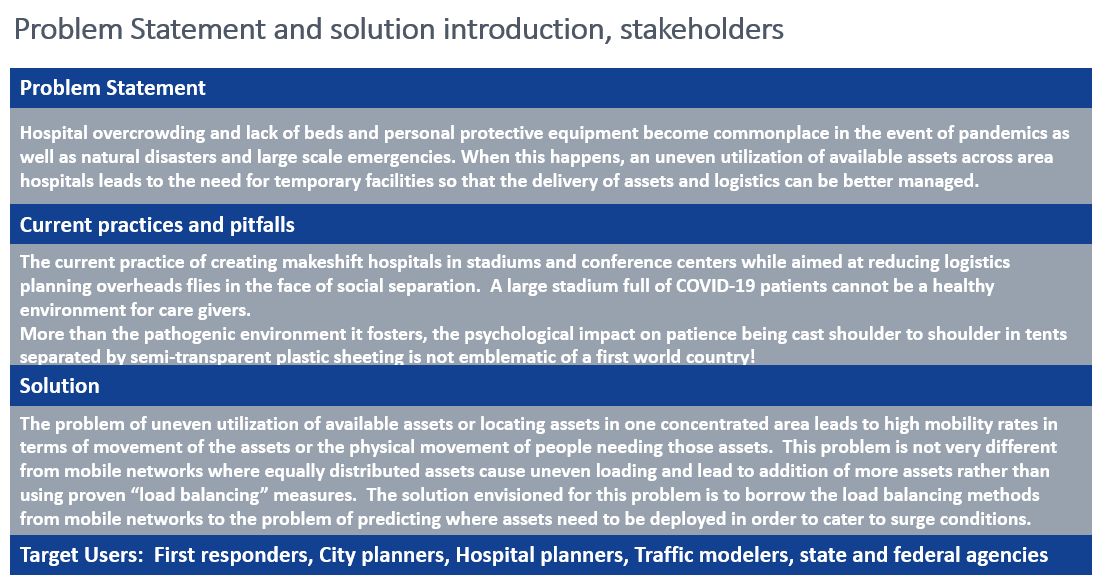

In [17]:
CLIENT_ID = 'OM1SXYU0TXVYK115IQ0RQ4RSVCA4IXPME03N54EVLCCDFLG5' # your Foursquare ID
CLIENT_SECRET = 'XDLCVG1UH5OOYYW54XN1S0MRM3X1MMEJSPA2ZSHH0FKDTOUN' # your Foursquare Secret
VERSION = '20200418' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OM1SXYU0TXVYK115IQ0RQ4RSVCA4IXPME03N54EVLCCDFLG5
CLIENT_SECRET:XDLCVG1UH5OOYYW54XN1S0MRM3X1MMEJSPA2ZSHH0FKDTOUN


# Find the category ID for hospitals and create a http query to FourSquare to get 10-20 hospitals centred around each neighborhood. The range of 10-20 will be compared to gauge the number of unique hospitals returned in the search. The distance from the search point to each hospital is also of immense interest to the solution.
### The four square database returns only postal codes for each hospital so we will find all hospitals around each postal code###

# Get rid of data that we will not need. Since we are iterating for each neighborhood and finding the 10-20 closest hospitals, 
## the distance and postal codes along with the hospital names are the data of interest to map to the nieghborhood data that we already have mapped

In [18]:
LIMIT = 20 # limit of number of hospitals returned by Foursquare API for each neighborhood to 10

categoryID= '4bf58dd8d48988d196941735' # category for hospitals
df_hosp= pd.DataFrame()

# Copy relevant entries from the dictionary into a dataframe
for lat, lng, postal in zip(df_cn_data['Latitude'], df_cn_data['Longitude'], df_cn_data['Postal code']):
    # create URL
    foursquare_url = 'https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId={}&client_id={}&client_secret={}&limit={}&v={}'.format(
    lat, 
    lng,
    categoryID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    LIMIT,
    VERSION)
    
    t_hosp= requests.get(foursquare_url).json()
    hospitals= t_hosp['response']['venues']
    print(postal)
    df= json_normalize(hospitals)
           
    # Remove the unncessary columns
    # for each list of hospitals build a master dataframe
    df.drop(['hasPerk', 'categories','id', 'location.cc', 'location.crossStreet','location.address', 'location.city', 'location.country', 'location.formattedAddress', 'location.labeledLatLngs', 'location.state', 'referralId'], axis=1, inplace=True)
    # Create a new column that has the first part of the postal code
    new= df['location.postalCode'].str.split(" ",n= 1, expand=True)
    df["postal Prefix"]= new[0]
    df["Source Lat"]= lat
    df["Source Long"]= lng
    df["Source Postal Code"]= postal
    # Append this new data frame to the last one
    df_hosp= df_hosp.append(df, ignore_index= True)
    df_hosp.head()

M1B
M1C
M1E
M1G
M1H
M1J
M1K
M1L
M1M
M1N
M1P
M1R
M1S
M1T
M1V
M1W
M1X
M2H
M2J
M2K
M2L
M2M
M2N
M2P
M2R
M3A
M3B
M3C
M3H
M3J
M3K
M3L
M3M
M3N
M4A
M4B
M4C
M4E
M4G
M4H
M4J
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5M
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6A
M6B
M6C
M6E
M6G
M6H
M6J
M6K
M6L
M6M
M6N
M6P
M6R
M6S
M7A
M7R
M7Y
M8V
M8W
M8X
M8Y
M8Z
M9A
M9B
M9C
M9L
M9M
M9N
M9P
M9R
M9V
M9W


# We now have a dictionary object with hospital names and location for each postal code etc #
## we can now create a dataframe that contains the relevant data and map them into each neighborhood based on the Postal Codes ##

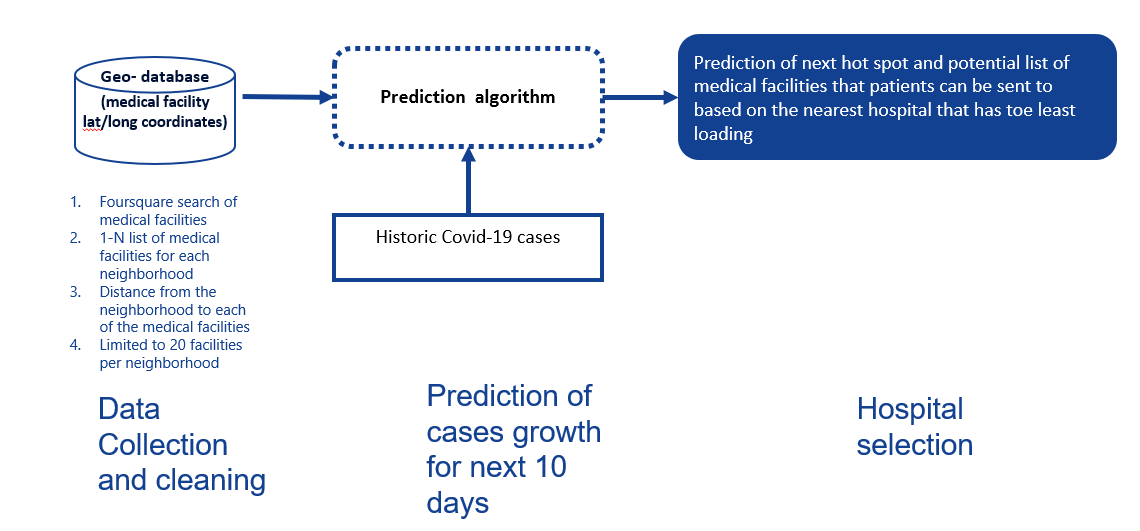

## week#5:  Implementation: We first find the category ID for hospitals and create a http query to FourSquare to get 10-20 hospitals centred around each neighborhood. The range of 10-20 will be compared to gauge the number of unique hospitals returned in the search. The distance from the search point to each hospital is also of immense interest to the solution. The foursquare database returns only postal codes for each hospital so we will find all hospitals around each postal code.  Get rid of data that we will not need. Since we are iterating for each neighborhood and finding the 10-20 closest hospitals. 

# To get the COVID-19 demands, none of the website (John Hopkins github site) list by borough or psotal code, we will have to build an assumed demand list #

In [19]:
# List the unique hospital names
hospital_names= df_hosp['name'].value_counts()
hospital_names

Rouge Valley Centenary Hospital                                        103
Michael Garron Hospital                                                103
Bridgepoint Health                                                     103
Princess Margaret Cancer Centre                                        103
North York General Hospital                                            103
Women's College Hospital                                               103
Sunnybrook Health Sciences Centre                                      103
Toronto Rehabilitation Institute                                       103
Providence HealthCare                                                  103
Humber River Hospital                                                  103
The Hospital for Sick Children (SickKids)                              103
St. Joseph's Health Centre                                             103
Toronto Western Hospital                                               103
Mount Sinai Hospital     

## The next step is to map closest hospitals to neighborhoods

In [20]:
# Extend the df_cn_data with the list of hospitals found for each Postal code/Borough
df_cn_hospitals= pd.DataFrame(columns=['Postal Code','Borough', 'Neighborhood', 'Latitude', 'Longitude', 'Hospital Name', 'Hospital lat', 'Hospital long', 'Hospital Postal', 'Hospital Distance', 'Nearest Hospital', 'Nearest Distance'])

# Initialize temp storage
shortest_distance=[1000000]*len(df_cn_data)
nearest_hosp= [' ']*len(df_cn_data)

for index in range(len(df_cn_data)):
    shortest_distance[index]= 1000000
    nearest_hosp[index]= " "
    for index2 in range(len(df_hosp)):
        if df_cn_data['Postal code'].iloc[index]==  df_hosp['Source Postal Code'].iloc[index2]:
            if(df_hosp['location.distance'].iloc[index2] < shortest_distance[index]):
                shortest_distance[index]= df_hosp['location.distance'].iloc[index2]
                nearest_hosp[index]= df_hosp['name'].iloc[index2]
            df_cn_hospitals= df_cn_hospitals.append(pd.Series([df_cn_data['Postal code'].iloc[index],
                                                               df_cn_data['Borough'].iloc[index],
                                                               df_cn_data['Neighborhood'].iloc[index],
                                                               df_cn_data['Latitude'].iloc[index],
                                                               df_cn_data['Longitude'].iloc[index],
                                                               df_hosp['name'].iloc[index2],
                                                               df_hosp['location.lat'].iloc[index2],
                                                               df_hosp['location.lng'].iloc[index2],
                                                               df_hosp['location.postalCode'].iloc[index2],
                                                               df_hosp['location.distance'].iloc[index2],
                                                               nearest_hosp[index],
                                                               shortest_distance[index]],
                                                               index=df_cn_hospitals.columns),
                                                        ignore_index=True)
df_cn_hospitals

Postal Code           Borough  \
0            M1B       Scarborough   
1            M1B       Scarborough   
2            M1B       Scarborough   
3            M1B       Scarborough   
4            M1B       Scarborough   
5            M1B       Scarborough   
6            M1B       Scarborough   
7            M1B       Scarborough   
8            M1B       Scarborough   
9            M1B       Scarborough   
10           M1B       Scarborough   
11           M1B       Scarborough   
12           M1B       Scarborough   
13           M1B       Scarborough   
14           M1B       Scarborough   
15           M1B       Scarborough   
16           M1B       Scarborough   
17           M1B       Scarborough   
18           M1B       Scarborough   
19           M1B       Scarborough   
20           M1C       Scarborough   
21           M1C       Scarborough   
22           M1C       Scarborough   
23           M1C       Scarborough   
24           M1C       Scarborough   
25           M1C       Scarborough   
26           M1C       Scarborough   
27           M1C       Scarborough   
28           M1C       Scarborough   
29           M1C       Scarborough   
30           M1C       Scarborough   
31           M1C       Scarborough   
32           M1C       Scarborough   
33           M1C       Scarborough   
34           M1C       Scarborough   
35           M1C       Scarborough   
36           M1C       Scarborough   
37           M1C       Scarborough   
38           M1C       Scarborough   
39           M1C       Scarborough   
40           M1E       Scarborough   
41           M1E       Scarborough   
42           M1E       Scarborough   
43           M1E       Scarborough   
44           M1E       Scarborough   
45           M1E       Scarborough   
46           M1E       Scarborough   
47           M1E       Scarborough   
48           M1E       Scarborough   
49           M1E       Scarborough   
50           M1E       Scarborough   
51           M1E       Scarborough   
52           M1E       Scarborough   
53           M1E       Scarborough   
54           M1E       Scarborough   
55           M1E       Scarborough   
56           M1E       Scarborough   
57           M1E       Scarborough   
58           M1E       Scarborough   
59           M1E       Scarborough   
60           M1G       Scarborough   
61           M1G       Scarborough   
62           M1G       Scarborough   
63           M1G       Scarborough   
64           M1G       Scarborough   
65           M1G       Scarborough   
66           M1G       Scarborough   
67           M1G       Scarborough   
68           M1G       Scarborough   
69           M1G       Scarborough   
70           M1G       Scarborough   
71           M1G       Scarborough   
72           M1G       Scarborough   
73           M1G       Scarborough   
74           M1G       Scarborough   
75           M1G       Scarborough   
76           M1G       Scarborough   
77           M1G       Scarborough   
78           M1G       Scarborough   
79           M1G       Scarborough   
80           M1H       Scarborough   
81           M1H       Scarborough   
82           M1H       Scarborough   
83           M1H       Scarborough   
84           M1H       Scarborough   
85           M1H       Scarborough   
86           M1H       Scarborough   
87           M1H       Scarborough   
88           M1H       Scarborough   
89           M1H       Scarborough   
90           M1H       Scarborough   
91           M1H       Scarborough   
92           M1H       Scarborough   
93           M1H       Scarborough   
94           M1H       Scarborough   
95           M1H       Scarborough   
96           M1H       Scarborough   
97           M1H       Scarborough   
98           M1H       Scarborough   
99           M1H       Scarborough   
100          M1J       Scarborough   
101          M1J       Scarborough   
102          M1J       Scarborough   
103          M1J       Scarborough   
104          M1

## We now have the 10 nearest hospitals to every Borough in Toronto. We also have the distance (in metres) to these hospitals ##
## With added details such as Covid-19 outbreak rates in each borough and the loading/logistics/avaialble beds/staff information in each hospital, we can direct the next patient to the right hospital ##

In [21]:
from folium.map import Marker, Popup

# Let's see them on a map
# create map of Toronto showing neighborhoods as blue circles and hospitals as blue markers.  
# Clicking on each neighborhood will show the name and the distance to the closest hospital
# When armed with COVID-19 incidences and hospital load factors, other hospital choices will be chosen
map_Toronto_hospitals = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, neighborhood, nearest_hosp, nearest_distance in zip(df_cn_hospitals['Latitude'], df_cn_hospitals['Longitude'], df_cn_hospitals['Borough'], df_cn_hospitals['Neighborhood'],df_cn_hospitals['Nearest Hospital'],df_cn_hospitals['Nearest Distance']):
    label = '{}, {}, {}, {}, {}, {},{}'.format(neighborhood, borough, "Hospital-->", nearest_hosp, "is", nearest_distance, "m away")
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto_hospitals)
    
for hosp_lat, hosp_lng, hosp_name in zip(df_cn_hospitals['Hospital lat'], df_cn_hospitals['Hospital long'], df_cn_hospitals['Hospital Name']):
#   show hospitals
    label = '{}'.format(hosp_name)
    label = folium.Popup(label, parse_html=True)
    map_Toronto_hospitals.add_child(folium.Marker(
                                  location= [hosp_lat, hosp_lng],
                                  popup=label))
    
# Hovering over each neighborhood will show the closest hospital to that neighborhood. This is our baseline
map_Toronto_hospitals

In [22]:
df_cn_hospitals['Hospital Name'].unique()

array(['Humber River Hospital', 'Southlake Regional Health Centre',
       'The Hospital for Sick Children (SickKids)',
       'Michael Garron Hospital', 'Toronto Rehabilitation Institute',
       'Southlake Regional Health Centre EMERGENCY',
       'North York General Hospital', 'Toronto Western Hospital',
       'Rouge Valley Centenary Hospital', 'Providence HealthCare',
       'Bridgepoint Health',
       "Childbirth & Children's Centre Wing at Markham Stouffville Hospital",
       'Toronto General Hospital', 'Sunnybrook Health Sciences Centre',
       'Mount Sinai Hospital', 'Markham Stouffville Hospital',
       'Princess Margaret Cancer Centre', "St. Joseph's Health Centre",
       "Women's College Hospital", 'Sunnybrook Hospital',
       'M-wing: Sunnybrook', 'Emergency Toronto East General Hopital',
       'Etobicoke General Hospital', 'Trillium Health Centre',
       'Brampton Civic Hospital', 'Credit Valley Hospital',
       'Oakville Trafalgar Memorial Hospital'], dtype=obje

# Now that we have a list of hospitals closest and alternates for each neighborhood, we need:
## 1) COVID-19 cases in each neighborhood
## 2) Hospital load factors
## The final implementation step is to collect historic covid-19 incidence rates.  Given the absence of neighborhood level data for covid-19 spread, we will use this website with the assumption that the growth rates for he US at a country level matches the rate at our worst affected area: NY City.

## The website used for the covid-19 case history is:
## https://raw.githubusercontent.com/datasets/covid-19/master/data/key-countries-pivoted.csv


In [23]:
# Generate data for COVID-19 cases per neighborhood, read from excel
# Data is based on https://raw.githubusercontent.com/datasets/covid-19/master/data/key-countries-pivoted.csv using US growth rates
# The US growth rates for the prior two weeks will be randomly distributed across the borough areas
# Generate data for hospital load factors, read from excel
# Based on the number of COVID-19 cases and hospital load factors, 
# the preferred hospital will be modified to the next closest hospital

covidcasefile= "https://raw.githubusercontent.com/datasets/covid-19/master/data/key-countries-pivoted.csv"
# hospitalLoad_url=  "" NO SUITABLE DATA FOUND ONLINE
df_CC= pd.read_csv(covidcasefile)

# s_HLF= requests.get(hospitalLoad_url).content
# df_HLF= pd.read_csv(s.HLF)

# Clean up the data frame to only include one date column and one data column as required by prophet
df_CC.drop(['China', 'United_Kingdom','Italy', 'France', 'Germany','Spain', 'Iran'], axis=1, inplace=True)
df_CC.rename(columns={'Date': 'ds', 'US':'y'}, inplace=True)

print(df_CC.tail())
# Fit the Covid cases and hosptial load data
# Let's use facebook Prophet for forecsting simple COVID-projections and load factors\

m_CC = Prophet()
m_CC.fit(df_CC)

# Let's predict 10 days into the future
future = m_CC.make_future_dataframe(periods=10)
future.tail()

forecast = m_CC.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

            ds       y
89  2020-04-20  784326
90  2020-04-21  811865
91  2020-04-22  840351
92  2020-04-23  869170
93  2020-04-24  905358


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/conda/envs/Python36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds          yhat    yhat_lower    yhat_upper
94  2020-04-25  9.356974e+05  9.334875e+05  9.380553e+05
95  2020-04-26  9.645667e+05  9.620577e+05  9.675484e+05
96  2020-04-27  9.935852e+05  9.902126e+05  9.972684e+05
97  2020-04-28  1.022845e+06  1.018395e+06  1.027436e+06
98  2020-04-29  1.052032e+06  1.045566e+06  1.059106e+06
99  2020-04-30  1.082510e+06  1.074550e+06  1.092136e+06
100 2020-05-01  1.113311e+06  1.102653e+06  1.126196e+06
101 2020-05-02  1.143401e+06  1.129764e+06  1.159137e+06
102 2020-05-03  1.172271e+06  1.156289e+06  1.191105e+06
103 2020-05-04  1.201289e+06  1.181353e+06  1.224028e+06

# With this 10 day prediction horizon, we can distribute the predicted loading across the granularity of our regions (neighborhoods) given # data availability on a per borough basis. 

<u>At the time of completion of this project, this data is not publicly available </u>

# A similar capability to monitor current hospital load factors will allow us to direct COVID-19 patients to the other hospitals
# Absent hospital load factors, the solution will only predict demand in terms of resources in specific regions without
# the capability to direct new cases to unloaded hospitals

In [24]:
## End of current IBM Data Science capstone assignment